<a href="https://colab.research.google.com/github/KenPascual/CPE311_Computational-Thinking-with-Python/blob/main/Seatwork_6_1_CPE311_Pascual%2C_Ken_Leonard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Supplementary Activity


##1

Given the following data structures:
```
sales = [100,130,119,92,35]
customer_account = ['B100','J101','X102','P103','R104']
city = ['BOS','LA','NYC','SF','CHI']
```



###Create a DataFrame with the data **above**

In [ ]:
import pandas as pd
sales = [100,130,119,92,35]
customer_account = ['B100','J101','X102','P103','R104']
city = ['BOS','LA','NYC','SF','CHI']

df = pd.DataFrame (
    {
        'sales' : sales,
        'customer_account': customer_account,
        'city' : city
    }
)
print(df.head())

   sales customer_account city
0    100             B100  BOS
1    130             J101   LA
2    119             X102  NYC
3     92             P103   SF
4     35             R104  CHI


###What is the name of the first column?

In [ ]:
df.iloc[:,0]

,sales
0,100
1,130
2,119
3,92
4,35


###Sort the DataFrame by city in descending order

In [ ]:
df.sort_values(by='city',axis=0,ascending=False,kind='mergesort')

,sales,customer_account,city
3,92,P103,SF
2,119,X102,NYC
1,130,J101,LA
4,35,R104,CHI
0,100,B100,BOS


###Which customer is in the last row of the DataFrame?

In [ ]:
df.iloc[-1,:]

,4
sales,35
customer_account,R104
city,CHI


###Reorder the columns with customer in the first column

In [ ]:
df.reindex(columns=['customer_account','sales','city'])

,customer_account,sales,city
0,B100,100,BOS
1,J101,130,LA
2,X102,119,NYC
3,P103,92,SF
4,R104,35,CHI


##2

Load the Titanic Dataset.


###What was the average age of the survivors?

In [21]:
import pandas as pd
file_path = "/content/drive/MyDrive/CPE22S3/[6] CPE 311/sw6.1/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Fill missing ages with the mean age of all passengers (explicit assignment)
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Compute the mean age of those who survived
mean_age_survived = df[df["Survived"] == 1]["Age"].mean()

# Print the result correctly
print(f"Mean age of survivors: {mean_age_survived}")

Mean age of survivors: 28.549778121775027


### What was the combined survival rate of both children (Age less than 18) and seniors (Age greater than 60)?

In [22]:
import pandas as pd
file_path = "/content/drive/MyDrive/CPE22S3/[6] CPE 311/sw6.1/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Remove rows where "Age" is NaN
df = df.dropna(subset=["Age"])

# Filter only children (Age < 18) and seniors (Age > 60)
filtered_df = df[(df["Age"] < 18) | (df["Age"] > 60)]

# Compute survival rate
total_in_group = len(filtered_df)
survivors_in_group = filtered_df["Survived"].sum()  # Since "Survived" is 1 for survivors

# Avoid division by zero
if total_in_group > 0:
    combined_survival_rate = survivors_in_group / total_in_group
else:
    combined_survival_rate = 0

# Print the result as a percentage
print(f"Combined survival rate of children and seniors: {combined_survival_rate:.2%}")

Combined survival rate of children and seniors: 48.89%


###Group by pClass and investigate average survival rate, age and fare.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = "/content/drive/MyDrive/CPE22S3/[6] CPE 311/sw6.1/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Remove rows where "Age" or "Fare" is NaN
df = df.dropna(subset=["Age", "Fare"])

# Group by "Pclass" and calculate average survival rate, age, and fare
pclass_summary = df.groupby("Pclass").agg(
    avg_survival_rate=("Survived", "mean"),  # Survival rate (avg of 0s and 1s)
    avg_age=("Age", "mean"),                 # Average age
    avg_fare=("Fare", "mean")                # Average fare
).reset_index()

# Convert survival rate to percentage for readability
pclass_summary["avg_survival_rate"] *= 100

# Print the summary table
print(pclass_summary)


   Pclass  avg_survival_rate    avg_age   avg_fare
0       1          65.591398  38.233441  87.961582
1       2          47.976879  29.877630  21.471556
2       3          23.943662  25.140620  13.229435


####With visualization using matplotlib.pyplot

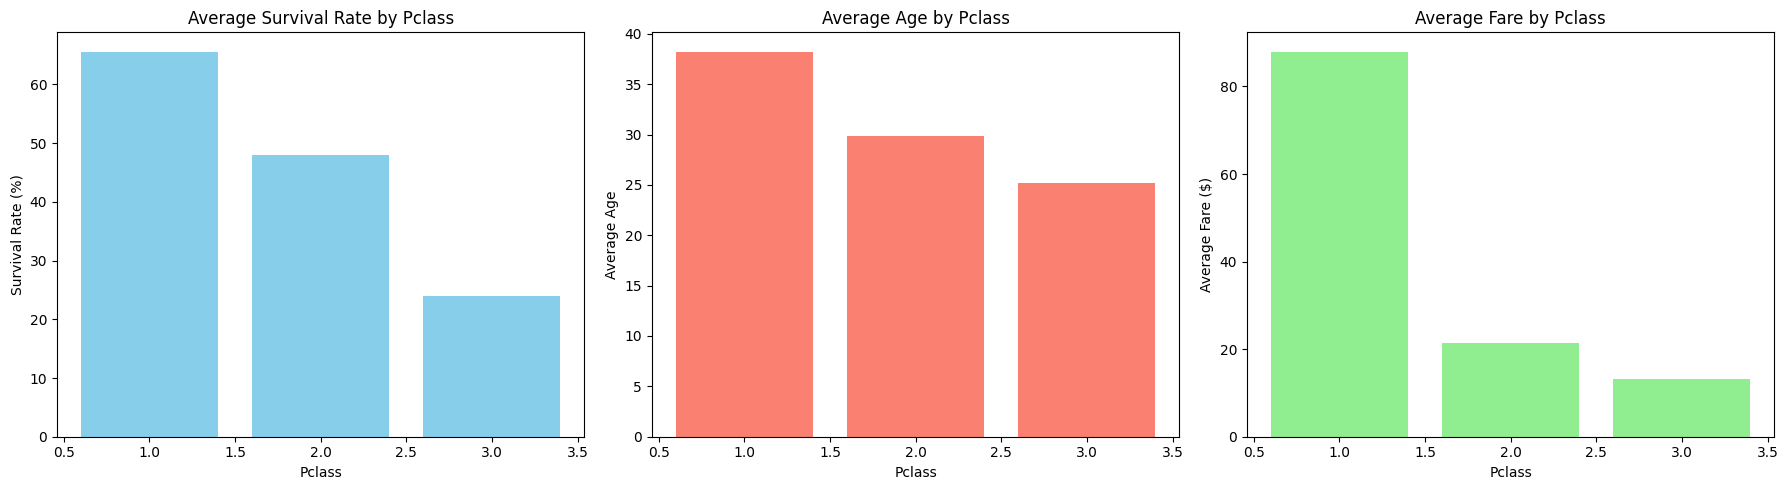

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = "/content/drive/MyDrive/CPE22S3/[6] CPE 311/sw6.1/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Remove rows where "Age" or "Fare" is NaN
df = df.dropna(subset=["Age", "Fare"])

# Group by "Pclass" and calculate average survival rate, age, and fare
pclass_summary = df.groupby("Pclass").agg(
    avg_survival_rate=("Survived", "mean"),
    avg_age=("Age", "mean"),
    avg_fare=("Fare", "mean")
).reset_index()

# Convert survival rate to percentage
pclass_summary["avg_survival_rate"] *= 100

# Plot the data using subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Bar chart for Survival Rate
axes[0].bar(pclass_summary["Pclass"], pclass_summary["avg_survival_rate"], color="skyblue")
axes[0].set_title("Average Survival Rate by Pclass")
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Survival Rate (%)")

# Bar chart for Average Age
axes[1].bar(pclass_summary["Pclass"], pclass_summary["avg_age"], color="salmon")
axes[1].set_title("Average Age by Pclass")
axes[1].set_xlabel("Pclass")
axes[1].set_ylabel("Average Age")

# Bar chart for Average Fare
axes[2].bar(pclass_summary["Pclass"], pclass_summary["avg_fare"], color="lightgreen")
axes[2].set_title("Average Fare by Pclass")
axes[2].set_xlabel("Pclass")
axes[2].set_ylabel("Average Fare ($)")

# Improve layout and display the plot
plt.tight_layout()
plt.show()


### Create a CSV with the names and ages of the survivors and another CSV file with the names and ages of the deceased.

In [25]:
import pandas as pd
file_path = "/content/drive/MyDrive/CPE22S3/[6] CPE 311/sw6.1/Titanic-Dataset.csv"
df = pd.read_csv(file_path)

# Remove rows where "Age" or "Name" is NaN (to ensure complete data)
df = df.dropna(subset=["Age", "Name"])

# Create two separate DataFrames
survivors_df = df[df["Survived"] == 1][["Name", "Age"]]
deceased_df = df[df["Survived"] == 0][["Name", "Age"]]

# Save to CSV files
survivors_df.to_csv("Survivors.csv", index=False)
deceased_df.to_csv("Deceased.csv", index=False)

print("CSV files created: Survivors.csv and Deceased.csv")
# Display first 5 rows of survivors
print("Survivors.csv (first 5 rows):")
print(survivors_df.head())

# Display first 5 rows of deceased
print("\nDeceased.csv (first 5 rows):")
print(deceased_df.head())

CSV files created: Survivors.csv and Deceased.csv
Survivors.csv (first 5 rows):
                                                Name   Age
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0
2                             Heikkinen, Miss. Laina  26.0
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0
9                Nasser, Mrs. Nicholas (Adele Achem)  14.0

Deceased.csv (first 5 rows):
                              Name   Age
0          Braund, Mr. Owen Harris  22.0
4         Allen, Mr. William Henry  35.0
6          McCarthy, Mr. Timothy J  54.0
7   Palsson, Master. Gosta Leonard   2.0
12  Saundercock, Mr. William Henry  20.0
